In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
# Import the data from medical_examination.csv and assign it to the df variable.
df = pd.read_csv('medical_examination.csv')
print(df.head(10))
df.shape
print(df['cardio'].unique())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   
5   8  21914    1     151    67.0    120     80            2     2      0   
6   9  22113    1     157    93.0    130     80            3     1      0   
7  12  22584    2     178    95.0    130     90            3     3      0   
8  13  17668    1     158    71.0    110     70            1     1      0   
9  14  19834    1     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       

In [227]:
# 2
# Add an overweight column to the data. To determine if a person is overweight, 
# first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
# If that value is > 25 then the person is overweight. 
# Use the value 0 for NOT overweight and the value 1 for overweight.
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda x: 1 if x > 25 else 0)
df['overweight'].value_counts()
df.head(10)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


In [228]:
# 3
# Normalize data by making 0 always good and 1 always bad. 
# If the value of cholesterol or gluc is 1, set the value to 0. 
# If the value is more than 1, set the value to 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

   cardio     variable  value  total
0       0       active      0   6378
1       0       active      1  28643
2       0         alco      0  33080
3       0         alco      1   1941
4       0  cholesterol      0  29330
5       0  cholesterol      1   5691
6       0         gluc      0  30894
7       0         gluc      1   4127
8       0   overweight      0  15915
9       0   overweight      1  19106


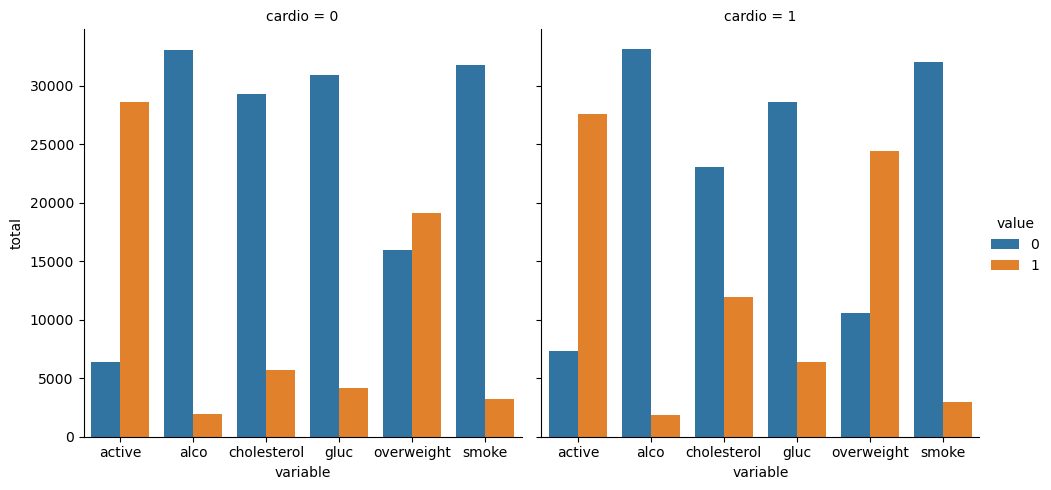

In [229]:
# 4
# Draw Categorical Plot
def draw_cat_plot():
    # 5
    # Create DataFrame for cat plot using `pd.melt` 
    # using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    

    # 6
    # Group and reformat the data to split it by 'cardio'. 
    # Show the counts of each feature.
    df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable', 'value'])['value'].count()).rename(columns={'value': 'total'}).reset_index()
    
    print(df_cat.head(10))
    


    # 7
    # Convert the data into long format and create a chart 
    # that shows the value counts of the categorical features 
    # using the following method provided by the seaborn library 
    # import: sns.catplot().
    
     
    
    # 8
    # Get the figure for the output and store it in the fig variable.
    
    fig = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')  
    plt.show()
    # 9
    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


draw_cat_plot()

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            0     0      0   
1   1  20228    1     156    85.0    140     90            1     0      0   
2   2  18857    1     165    64.0    130     70            1     0      0   
3   3  17623    2     169    82.0    150    100            0     0      0   
4   4  17474    1     156    56.0    100     60            0     0      0   
5   8  21914    1     151    67.0    120     80            1     1      0   
6   9  22113    1     157    93.0    130     80            1     0      0   
7  12  22584    2     178    95.0    130     90            1     1      0   
8  13  17668    1     158    71.0    110     70            0     0      0   
9  14  19834    1     164    68.0    110     60            0     0      0   

   alco  active  cardio  overweight  
0     0       1       0           0  
1     0       1       1           1  
2     0       0       1           0  


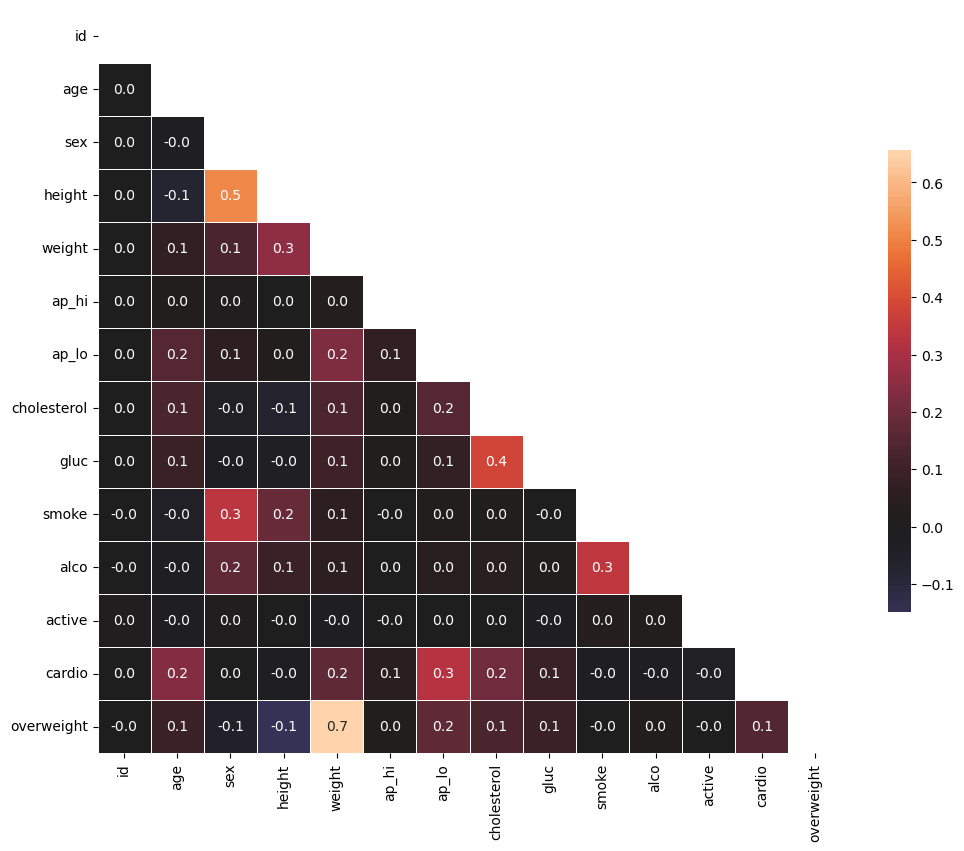

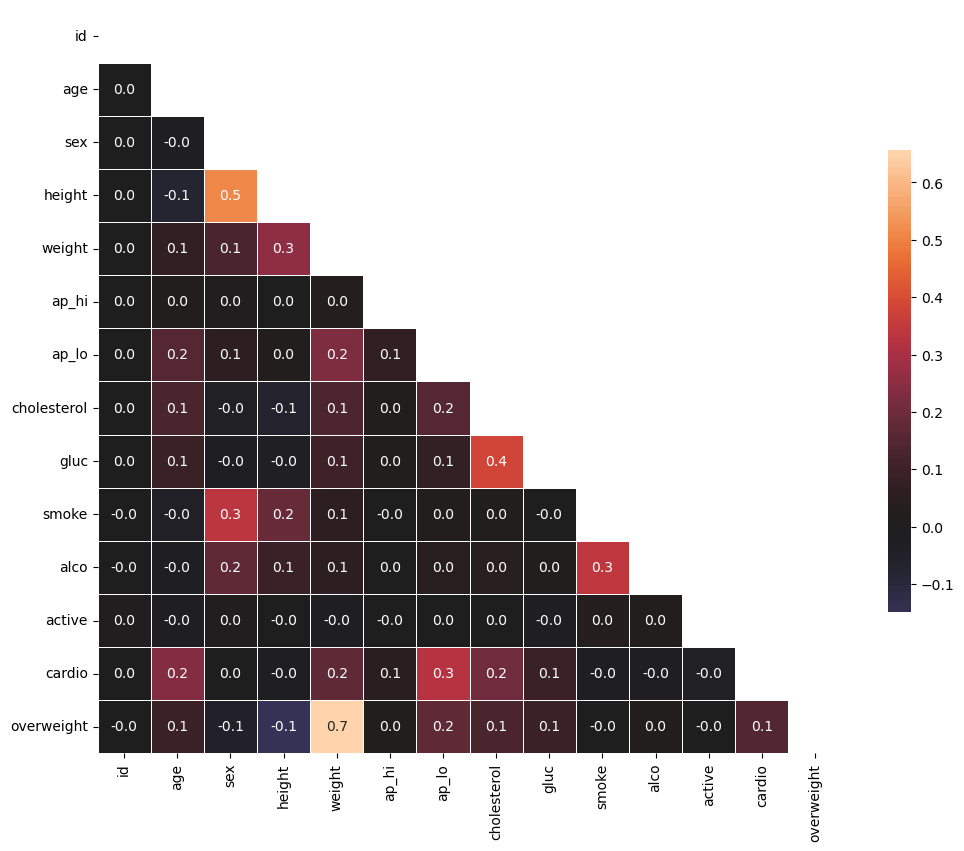

In [230]:
# 10
# Draw Heat Map
def draw_heat_map():
    # 11
    # Clean the data
    # Filter out the following patient segments that represent incorrect data:
    # diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    # height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # height is more than the 97.5th percentile
    # weight is less than the 2.5th percentile
    # weight is more than the 97.5th percentile
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) & 
                 (df['height'] <= df['height'].quantile(0.975)) & 
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
    print(df_heat.head(10))

    # 12
    # Calculate the correlation matrix and store it in the variable corr.
    corr = df_heat.corr()
    print(corr)

    # 13
    # Generate a mask for the upper triangle and store it in the variable mask.
    mask = np.triu(corr)
    

    # 14
    # Set up the matplotlib figure
    
    fig, ax = plt.subplots(figsize=(12, 12))

    # 15
    # Plot the correlation matrix using seaborn's heatmap().
    sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, square=True, center=0, linewidths=.5, cbar_kws={'shrink': .5}, ax=ax)
    
    

    # 16
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()

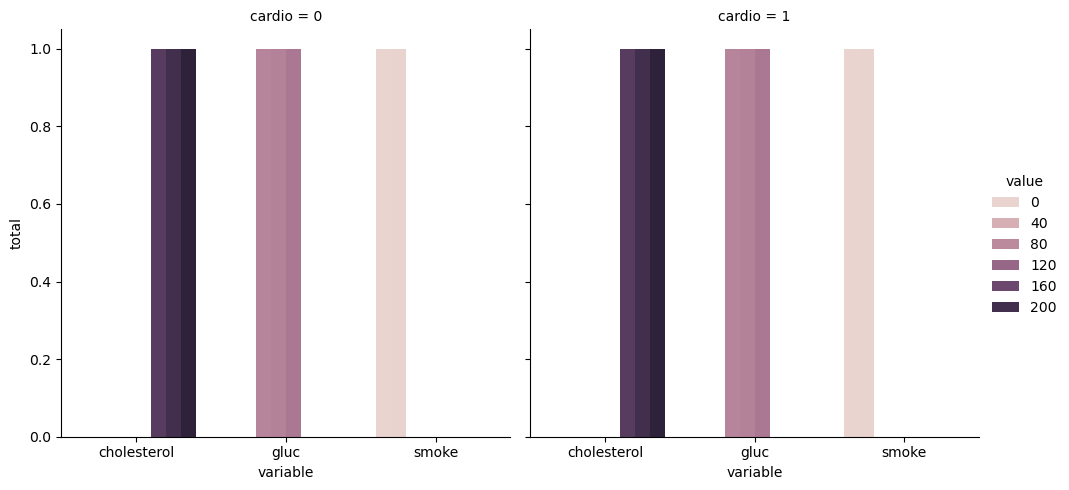

In [231]:

# Sample DataFrame
df_cat = pd.DataFrame({
    'cardio': [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
    'variable': ['cholesterol', 'cholesterol', 'cholesterol', 'cholesterol', 'cholesterol', 'cholesterol', 'gluc', 'gluc', 'gluc', 'gluc', 'gluc', 'gluc', 'smoke', 'smoke', 'smoke', 'smoke', 'smoke', 'smoke'],
    'value': [200, 180, 220, 200, 180, 220, 90, 85, 100, 90, 85, 100, 1, 0, 1, 1, 0, 1],
    'total': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
})

# Create the categorical plot
fig = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar').figure
plt.show()

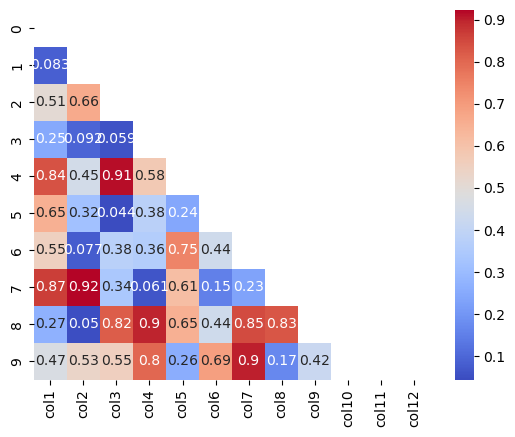

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a sample DataFrame
data = np.random.rand(10, 12)
df = pd.DataFrame(data, columns=[f'col{i}' for i in range(1, 13)])

# Create a mask
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True  # Mask the upper triangle

# Create and display the heatmap with the mask
sns.heatmap(df, mask=mask, cmap='coolwarm', annot=True)
plt.show()